In [1]:
# TO DO:
# - Detect and remove duplicate albums
# - Delete albums with less than 3? songs
# - Amount of artists you only have one album from?
# - Debut album release year from artists histogram?
# - How many artists are currently active (not really possible I think, unless you say like released in past 4 years idk)
# - Instead of saved albums top 100? albums?
# - What years have you listened to most

In [2]:
import sys
!{sys.executable} -m pip install spotipy

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt

In [4]:
!{sys.executable} -m pip install mplcursors
import mplcursors

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="9043e20f8eff47d6a9dba948ca2c0501",
                                               client_secret="d3285922e30d4cfbaf9f00d76e769069",
                                               redirect_uri="http://localhost:3000",
                                               scope="user-library-read"))

In [6]:
def get_all_saved_albums(sp, limit_step=50):
    albums = []
    offset = 0

    while True:
        # Get the saved albums for this range (offset+limit_step)
        results = sp.current_user_saved_albums(limit=limit_step, offset=offset)

        # If there are no more saved albums, exit the loop
        if len(results['items']) == 0:
            break
        # For testing:
#         if offset == 50:
#             break

        # Add saved albums to list
        for idx, item in enumerate(results['items']):
            album = item['album']
            albums.append(album)

        offset += limit_step
    return albums

In [7]:
albums = get_all_saved_albums(sp)
print(len(albums))

825


In [8]:
n = 1
release_years = []
artists = []
artist_ids = []
album_ids = []

for album in albums:
    n += 1
    #print(album['release_date'][0:4])
    release_years.append(int(album['release_date'][0:4]))
    artists.append(album['artists'][0]['name'])
    artist_ids.append(album['artists'][0]['id'])
    album_ids.append(album['id'])

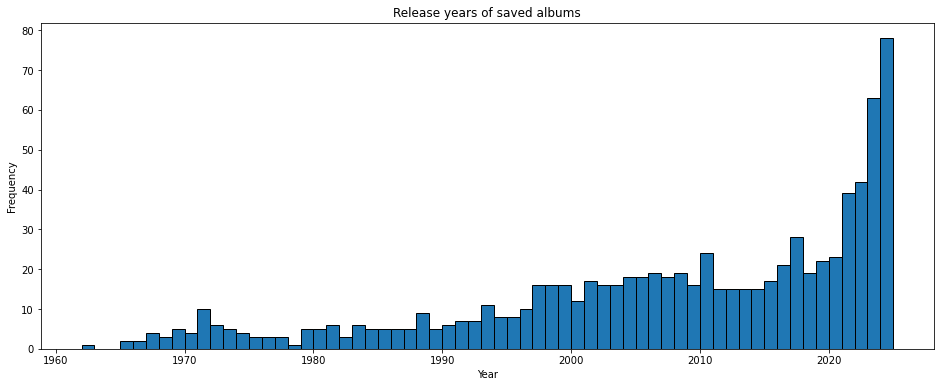

In [9]:
plt.figure(figsize=(16, 6))
n, bins, patches = plt.hist(release_years, bins=range(min(release_years), max(release_years) + 2), edgecolor='black')

plt.title('Release years of saved albums')
plt.xlabel('Year')
plt.ylabel('Frequency')

cursor = mplcursors.cursor(patches, hover=True)

@cursor.connect("add")
def on_add(sel):
    bin_index = sel.target.index
    sel.annotation.set(text=f'Count: {n[bin_index]}', position=(0, 20), anncoords="offset points")


plt.show()

In [10]:
artist_dict = dict.fromkeys(artists, 0)

for artist in artists:
    artist_dict[artist] += 1
    
artist_dict = {k: v for k, v in sorted(artist_dict.items(), reverse=True, key=lambda item: item[1])}

In [11]:
print("Artists which you have saved most albums from:")

ALBUM_AMOUNT = 20
i = 1
for key, value in artist_dict.items():
    print(f"{i}: {key}: {value} albums")
    #print(i, ". ", key, ":", value, "albums")
    if i >= ALBUM_AMOUNT:
        break
    i += 1

Artists which you have saved most albums from:
1: King Gizzard & The Lizard Wizard: 16 albums
2: Radiohead: 13 albums
3: Vulfpeck: 11 albums
4: Coldplay: 9 albums
5: Sufjan Stevens: 9 albums
6: The Beatles: 8 albums
7: Pink Floyd: 8 albums
8: Porcupine Tree: 7 albums
9: Big Thief: 7 albums
10: Muse: 7 albums
11: Arcade Fire: 7 albums
12: Beach House: 7 albums
13: MGMT: 6 albums
14: PJ Harvey: 6 albums
15: Vampire Weekend: 6 albums
16: Elliott Smith: 6 albums
17: Billie Eilish: 5 albums
18: Talking Heads: 5 albums
19: Steven Wilson: 5 albums
20: Kate Bush: 4 albums


In [12]:
print(f"You have saved {len(albums)} albums in total, from {len(artist_dict)} different artists")

You have saved 825 albums in total, from 467 different artists


In [13]:
sep_artist_ids = list(dict.fromkeys(artist_ids))

def find_debut_album(artist_id):
    albums_by_artist = sp.artist_albums(artist_id, album_type='album')
    return albums_by_artist

In [14]:
find_debut_album('7MSUfLeTdDEoZiJPDSBXgi')

{'href': 'https://api.spotify.com/v1/artists/7MSUfLeTdDEoZiJPDSBXgi/albums?offset=0&limit=20&include_groups=album',
 'limit': 20,
 'next': 'https://api.spotify.com/v1/artists/7MSUfLeTdDEoZiJPDSBXgi/albums?offset=20&limit=20&include_groups=album',
 'offset': 0,
 'previous': None,
 'total': 55,
 'items': [{'album_type': 'album',
   'total_tracks': 5,
   'available_markets': ['AT',
    'BE',
    'BG',
    'CY',
    'CZ',
    'DK',
    'DE',
    'EE',
    'FI',
    'FR',
    'GR',
    'HK',
    'HU',
    'IS',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'NL',
    'NO',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'AD',
    'LI',
    'MC',
    'ID',
    'JP',
    'TH',
    'VN',
    'RO',
    'IL',
    'ZA',
    'SA',
    'AE',
    'BH',
    'QA',
    'OM',
    'KW',
    'EG',
    'MA',
    'DZ',
    'TN',
    'LB',
    'JO',
    'PS',
    'IN',
    'BY',
    'KZ',
    'MD',
    'UA',
    'AL',
    'BA',
    'HR'